In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exploratory Data Analysis

In [ ]:
# Save the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Tilak-Shenoy/IE517/main/MLF_GP2_EconCycle.csv')
df.head()

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         223 non-null    object 
 1   T1Y Index    223 non-null    float64
 2   T2Y Index    223 non-null    float64
 3   T3Y Index    223 non-null    float64
 4   T5Y Index    223 non-null    float64
 5   T7Y Index    223 non-null    float64
 6   T10Y Index   223 non-null    float64
 7   CP1M         223 non-null    float64
 8   CP3M         223 non-null    float64
 9   CP6M         223 non-null    float64
 10  CP1M_T1Y     223 non-null    float64
 11  CP3M_T1Y     223 non-null    float64
 12  CP6M_T1Y     223 non-null    float64
 13  USPHCI       223 non-null    float64
 14  PCT 3MO FWD  223 non-null    float64
 15  PCT 6MO FWD  223 non-null    float64
 16  PCT 9MO FWD  223 non-null    float64
dtypes: float64(16), object(1)
memory usage: 29.7+ KB


In [ ]:
df.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,79.210000,0.020297,0.036636,0.050174


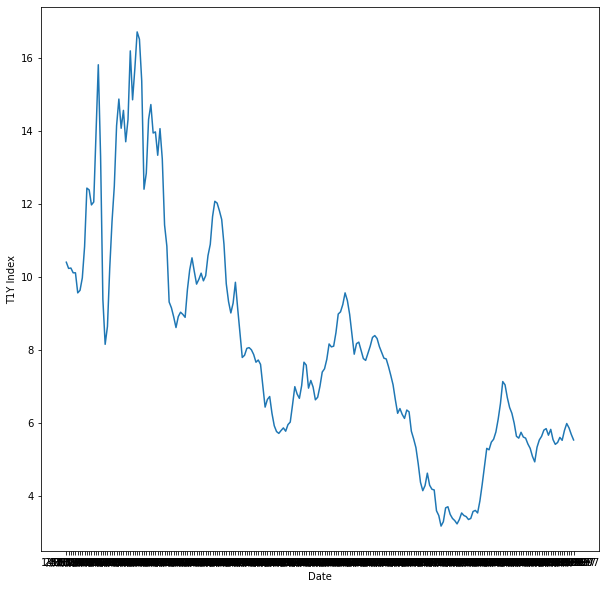

In [ ]:
# T1Y yield curve over time
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['T1Y Index'])
plt.xlabel('Date')
plt.ylabel('T1Y Index')
plt.show()

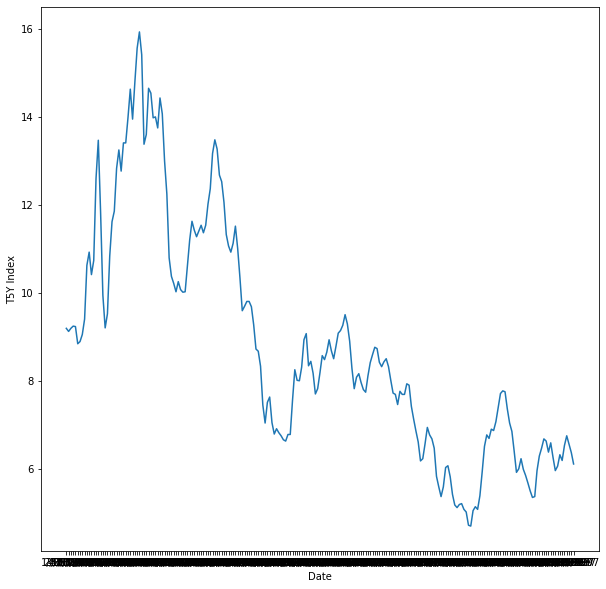

In [ ]:
# T5Y yield curve over time
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['T5Y Index'])
plt.xlabel('Date')
plt.ylabel('T5Y Index')
plt.show()

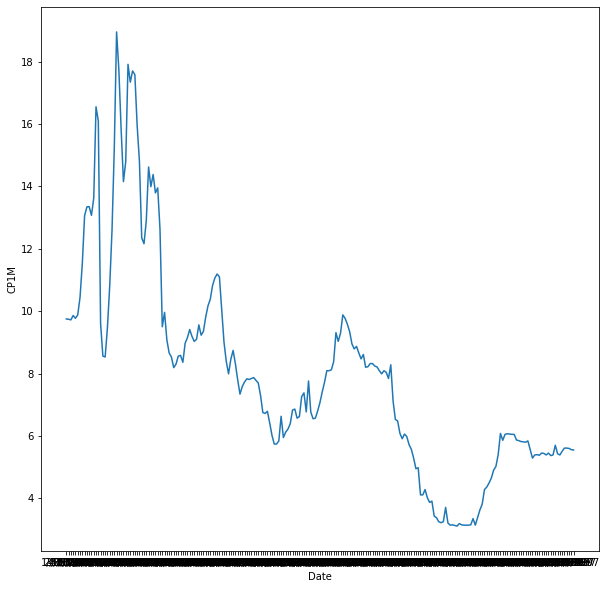

In [ ]:
# CP1M yield curve over time
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['CP1M'])
plt.xlabel('Date')
plt.ylabel('CP1M')
plt.show()

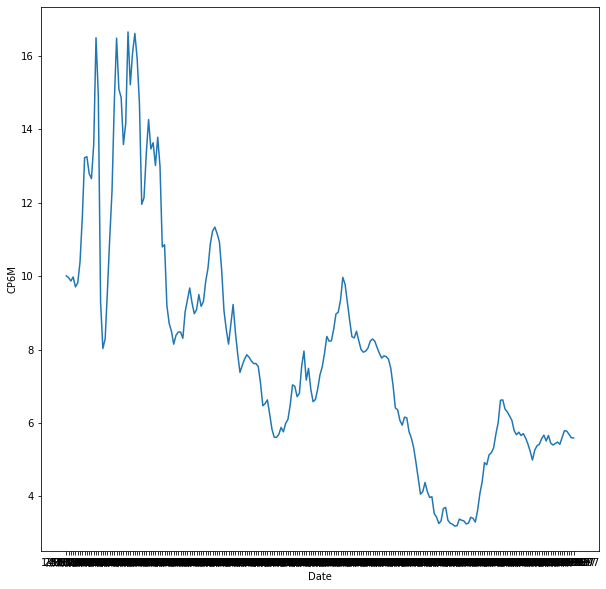

In [ ]:
# CP6M yield curve over time
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['CP6M'])
plt.xlabel('Date')
plt.ylabel('CP6M')
plt.show()

In [ ]:
# Dropping date to generate heat map
df = df.drop('Date', axis =1)

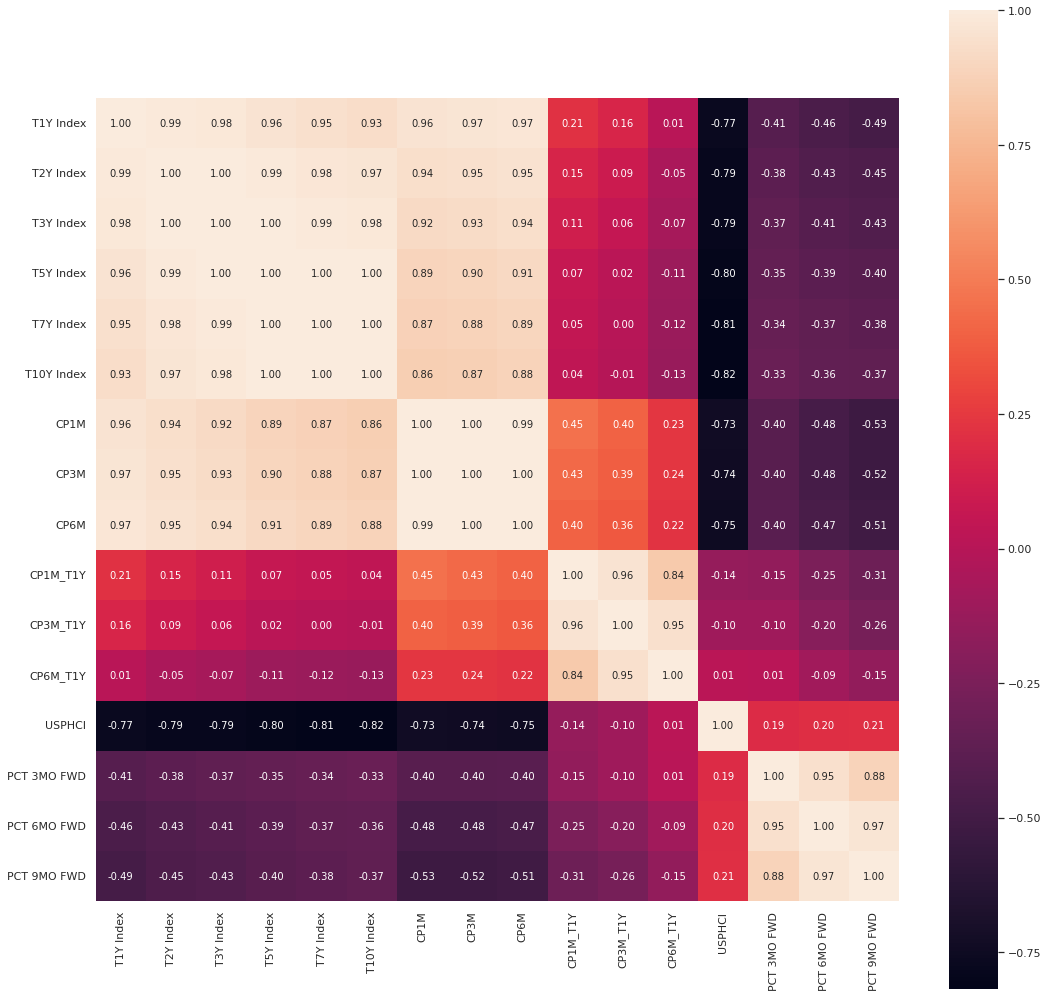

In [ ]:
# Generating heatmap
cm = np.corrcoef(df[df.columns.values].values.T)
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(18,18)})
hm = sns.heatmap(cm, cbar = True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=df.columns.values, xticklabels=df.columns.values)
plt.show()

# Prediciting 3 Month FWD

In [ ]:
# Drop unnecessary data
df = df.drop(['USPHCI', 'PCT 6MO FWD', 'PCT 9MO FWD'], axis=1)

In [ ]:
# Set features and target
X = df.drop('PCT 3MO FWD', axis =1)
y = df['PCT 3MO FWD']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
# Run Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
lr.score(X_train, y_train)

0.30305921734232977

In [ ]:
lr.score(X_test,y_test)

0.005196195268129311

Trying PCA

In [ ]:
X_treasury = X.iloc[:,:6]

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(X_treasury)

In [ ]:
X = np.concatenate((X, df.iloc[:,6:9].to_numpy()), axis =1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.038086050996054256

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.255971276768277

In [ ]:
lr.score(X_test,y_test)

-0.03934062934774252

In [ ]:
# Scaling the data and trying with PCA
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.038086050996053056

In [ ]:
lr_scores.std()

0.34223791115455987

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.25597127676827713

In [ ]:
lr.score(X_test,y_test)

-0.01759818171604932

Trying a Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Create SVR model
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Evaluate model
svr_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("Support Vector Regression r2:", svr_scores.mean())

svr_mse_scores = -cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Support Vector Regression MSE:", svr_mse_scores.mean())


Support Vector Regression r2: -0.29469457567625434
Support Vector Regression MSE: 2.7937543263195033e-05


In [ ]:
svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [ ]:
svr.score(X_test,y_test)

-0.13074905316814078

SVR also does not perform very well. Trying KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
cv_scores = cross_val_score(knn,X_train,y_train, scoring='r2', cv=10)
cv_scores.mean()

0.42287789112042135

In [ ]:
cv_scores.std()

0.3140912605558477

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.4705181684168308

KNN performs decently better

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create random forest regressor
rfr = RandomForestRegressor(n_estimators=10)

rfr.fit(X_train,y_train)
rfr_scores = cross_val_score(rfr,X_train,y_train, cv=10)

In [ ]:
# Training accuracy
rfr_scores.mean()

0.49841956234858353

In [ ]:
# Testing accuracy
rfr.score(X_test,y_test)

0.275530780500988

Trying voting regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

# Create models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=10, random_state=1)
knn = KNeighborsRegressor()

# Create voting regression
vr = VotingRegressor(estimators=[('lr', lr), ('rf', rfr), ('knn', knn)])

In [ ]:
# Fit models
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('knn', KNeighborsRegressor())])

In [ ]:
train_r2 = cross_val_score(vr,X_train,y_train, scoring='r2', cv=10)

In [ ]:
# Training accuracy
train_r2.mean()

0.4660366051731294

In [ ]:
train_r2.std()

0.2231551856955593

In [ ]:
# Testing accuracy
vr.score(X_test, y_test)

0.3630456720576204

# Prediciting 6 Month Forward

In [ ]:
# Save the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Tilak-Shenoy/IE517/main/MLF_GP2_EconCycle.csv')
df.head()

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [ ]:
# Drop unnecessary data
df = df.drop(['Date', 'USPHCI', 'PCT 3MO FWD', 'PCT 9MO FWD'], axis=1)

In [ ]:
# Set features and target
X = df.drop('PCT 6MO FWD', axis =1)
y = df['PCT 6MO FWD']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
# Run Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
lr.score(X_train, y_train)

0.3287119547032836

In [ ]:
lr.score(X_test,y_test)

0.1544891897503431

Trying PCA

In [ ]:
X_treasury = X.iloc[:,:6]

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(X_treasury)

In [ ]:
X = np.concatenate((X, df.iloc[:,6:9].to_numpy()), axis =1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.10786150125580954

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.2982150116239052

In [ ]:
lr.score(X_test,y_test)

0.13740690142099865

In [ ]:
# Scaling the data and trying with PCA
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.1078615012558087

In [ ]:
lr_scores.std()

0.3172687462102298

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.2982150116239053

In [ ]:
lr.score(X_test,y_test)

0.1500504923729169

Trying Support Vector Regressor

In [ ]:
# Create SVR model
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Evaluate model
svr_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("Support Vector Regression r2:", svr_scores.mean())

svr_mse_scores = -cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Support Vector Regression MSE:", svr_mse_scores.mean())

Support Vector Regression r2: -0.20287737957465665
Support Vector Regression MSE: 8.949283193301463e-05


Trying KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
cv_scores = cross_val_score(knn,X_train,y_train, scoring='r2', cv=10)
cv_scores.mean()

0.5682583802659893

In [ ]:
cv_scores.std()

0.2870473258766618

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.6281895814568641

Trying Random Forest

In [ ]:
# Create random forest regressor
rfr = RandomForestRegressor(n_estimators=10)

rfr.fit(X_train,y_train)
rfr_scores = cross_val_score(rfr,X_train,y_train, cv=10)

In [ ]:
# Training accuracy
rfr_scores.mean()

0.5817179178678058

In [ ]:
# Testing accuracy
rfr.score(X_test,y_test)

0.6293067540802639

Trying voting regressor

In [ ]:
# Create models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=10, random_state=1)
knn = KNeighborsRegressor()

# Create voting regression
vr = VotingRegressor(estimators=[('lr', lr), ('rf', rfr), ('knn', knn)])

In [ ]:
# Fit models
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('knn', KNeighborsRegressor())])

In [ ]:
train_r2 = cross_val_score(vr,X_train,y_train, scoring='r2', cv=10)

In [ ]:
# Training accuracy
train_r2.mean()

0.583359732258742

In [ ]:
train_r2.std()

0.19165617716457706

In [ ]:
# Testing accuracy
vr.score(X_test, y_test)

0.52608921225732

# Predicting 9 Month Forward

In [ ]:
# Save the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Tilak-Shenoy/IE517/main/MLF_GP2_EconCycle.csv')
df.head()

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [ ]:
# Drop unnecessary data
df = df.drop(['Date', 'USPHCI', 'PCT 3MO FWD', 'PCT 6MO FWD'], axis=1)

In [ ]:
# Set features and target
X = df.drop('PCT 9MO FWD', axis =1)
y = df['PCT 9MO FWD']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
# Run Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
lr.score(X_train, y_train)

0.374112396593108

In [ ]:
lr.score(X_test,y_test)

0.31419742356051505

Trying PCA

In [ ]:
X_treasury = X.iloc[:,:6]

In [ ]:
pca = PCA(n_components = 3)
X = pca.fit_transform(X_treasury)

In [ ]:
X = np.concatenate((X, df.iloc[:,6:9].to_numpy()), axis =1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 44)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.1539035116586316

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.3308646813116469

In [ ]:
lr.score(X_test,y_test)

0.27722428994493997

In [ ]:
# Scaling the data and trying with PCA
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_scores.mean()

0.1539035116586315

In [ ]:
lr_scores.std()

0.2569722284300478

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.3308646813116468

In [ ]:
lr.score(X_test,y_test)

0.27709433345222945

Trying Support Vector Regressor

In [ ]:
# Create SVR model
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Evaluate model
svr_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("Support Vector Regression r2:", svr_scores.mean())

svr_mse_scores = -cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Support Vector Regression MSE:", svr_mse_scores.mean())

Support Vector Regression r2: -0.20324385638158077
Support Vector Regression MSE: 0.00017207308198820322


Trying KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
cv_scores = cross_val_score(knn,X_train,y_train, scoring='r2', cv=10)
cv_scores.mean()

0.6530820674679283

In [ ]:
cv_scores.std()

0.20422287808682185

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.6986523160231188

Trying Random Forest

In [ ]:
# Create random forest regressor
rfr = RandomForestRegressor(n_estimators=10)

rfr.fit(X_train,y_train)
rfr_scores = cross_val_score(rfr,X_train,y_train, cv=10)

In [ ]:
# Training accuracy
rfr_scores.mean()

0.6154783033497405

In [ ]:
# Testing accuracy
rfr.score(X_test,y_test)

0.40505870810363875

Trying voting regressor

In [ ]:
# Create models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=10, random_state=1)
knn = KNeighborsRegressor()

# Create voting regression
vr = VotingRegressor(estimators=[('lr', lr), ('rf', rfr), ('knn', knn)])

In [ ]:
# Fit models
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('knn', KNeighborsRegressor())])

In [ ]:
train_r2 = cross_val_score(vr,X_train,y_train, scoring='r2', cv=10)

In [ ]:
# Training accuracy
train_r2.mean()

0.6134410900123527

In [ ]:
train_r2.std()

0.16335780293255747

In [ ]:
# Testing accuracy
vr.score(X_test, y_test)

0.6069275982504923

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_range = [1,3,5,7,9,11,19]
param_grid = [{'n_neighbors': param_range}]
knn = KNeighborsRegressor()
rsv = GridSearchCV(knn, param_grid, scoring='r2', cv=10, n_jobs=1)

In [ ]:
train = rsv.fit(X_train,y_train)

In [ ]:
# Print result
print('Best Score: %s' % train.best_score_)
print('Best Hyperparameters: %s' % train.best_params_)

Best Score: 0.7034340107913464
Best Hyperparameters: {'n_neighbors': 1}


In [ ]:
y_test_pred = rsv.predict(X_test)

In [ ]:
rsv.score(X_test,y_test)

0.28085253854945336